In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import scipy.stats as st

In [2]:
# Observations 1. Capomulin is the one the best performing drug as it has constantly decreased the tumor volume
            #  2. Highest Variance in tumor volume was observed when Ramincane drug was used
            #  3.


In [3]:
# Reading Data 

data_drug = pd.read_csv("../data_Mouse_metadata.csv")
data_study = pd.read_csv("../data_Study_results.csv")

# Merging 2 datasets

combined_data = pd.merge(data_drug, data_study, on="Mouse ID")
combined_data



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Calculating Mean

tumor_mean = combined_data.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumor_mean

table_mean = pd.DataFrame({"Mean": tumor_mean})
table_mean

,Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [5]:
# Calculting the Variance

tumor_variance = combined_data.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumor_variance
table_variance = pd.DataFrame({"Variance": tumor_variance})
table_variance

,Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [6]:
# Calculating the Standard Deviation

tumor_sdeviation = combined_data.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumor_sdeviation

table_sdeviation = pd.DataFrame({"Standard Deviation": tumor_sdeviation})
table_sdeviation


,Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [7]:
# Calculation The SEM

tumor_sem = combined_data.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']
tumor_sem

table_sem = pd.DataFrame({"Standard Error in Mean": tumor_sem})
table_sem

,Standard Error in Mean
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [8]:
# Creating a dataFrame to hold all the values

tumorvolume_table = pd.DataFrame({"Mean in Tumor Volume": tumor_mean, "Variance in Tumor Volume": tumor_variance, 
                                 "Standard Deviation of Tumor Volume": tumor_sdeviation, "Standard Error in Mean": tumor_sem})
tumorvolume_table

,Mean in Tumor Volume,Variance in Tumor Volume,Standard Deviation of Tumor Volume,Standard Error in Mean
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.322552,42.351070,6.507770,0.512884
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


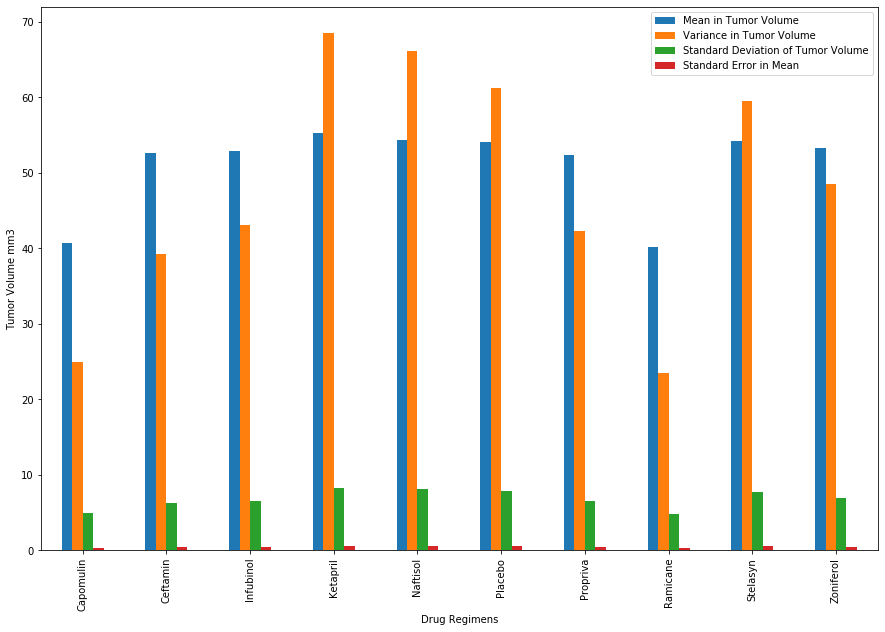

In [9]:
# Creating a bar plot

tumorvolume_bar = tumorvolume_table.plot(kind="bar", figsize=(15,10))
tumorvolume_bar
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume mm3")
plt.legend()
plt.show()




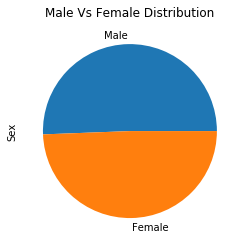

In [10]:
# Male and Female Distribution
sex_data = combined_data["Sex"].value_counts()
sex_data = sex_data.drop_duplicates()
sex_data.plot(kind="pie")
plt.title("Male Vs Female Distribution")
plt.show()

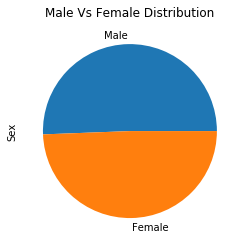

In [11]:
# Creating a pie using pyplot

pie_labels = ["Male", "Female"]
plt.pie(sex_data, labels=pie_labels)
plt.title("Male Vs Female Distribution")
plt.ylabel("Sex")
plt.show()

In [12]:
# Calculating the final tumor volume 

top4_regimens = combined_data.set_index("Drug Regimen")
top4_regimens

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [13]:
# Capomulin, Ramicane, Infubinol, and Ceftamin

top4_regimens_volume = top4_regimens.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"], ["Mouse ID", "Tumor Volume (mm3)"]]
top4_regimens_volume


,Mouse ID,Tumor Volume (mm3)
Drug Regimen,,
Capomulin,s185,45.000000
Capomulin,s185,43.878496
Capomulin,s185,37.614948
Capomulin,s185,38.177232
Capomulin,s185,36.866876
...,...,...
Ceftamin,y865,57.173538
Ceftamin,y865,59.033275
Ceftamin,y865,61.153140


In [14]:
# Final Volume of Each Mouse across the 4 Drug Regimens

top4_regimens_volume = top4_regimens_volume.groupby(['Drug Regimen', 'Mouse ID']).sum()['Tumor Volume (mm3)']
top4_regimens_volume





Drug Regimen  Mouse ID
Capomulin     b128        419.636356
              b742        400.836993
              f966        182.529864
              g288        419.900966
              g316        446.133439
                             ...    
Ramicane      s508        360.501562
              u196        455.763948
              w678         88.166373
              y449        181.439088
              z578        384.115100
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [15]:
# Creating A DataFrame for the Final Tumor Volume

table_top4 = pd.DataFrame({"Final Volume": top4_regimens_volume})
table_top4

Final Volume
Drug Regimen Mouse ID              
Capomulin    b128        419.636356
             b742        400.836993
             f966        182.529864
             g288        419.900966
             g316        446.133439
...                             ...
Ramicane     s508        360.501562
             u196        455.763948
             w678         88.166373
             y449        181.439088
             z578        384.115100

[100 rows x 1 columns]

In [16]:
Q1 = table_top4["Final Volume"].quantile(0.25)
Q1 = round(Q1,2)
print(f"The Lower Quartile of Final Tumor Volume is: {Q1}")

The Lower Quartile of Final Tumor Volume is: 340.0


In [17]:
Q3 = table_top4["Final Volume"].quantile(0.75)
Q3 = round(Q3,2)
print(f"The Upper Quartile of Final Tumor Volume is: {Q3}")

The Upper Quartile of Final Tumor Volume is: 449.98


In [18]:
# IQR

iqr = Q3 - Q1
iqr = round(iqr,2)
iqr

109.98

In [19]:
# Calculating Potential Outliers
lower_bound = round(Q1 - (1.5*iqr),2)
upper_bound = round(Q3 + (1.5*iqr),2)

In [20]:
print(f"The Lower Quartile of Tumor Volume is: {Q1}")
print(f"The Upper Quartile of Tumor Volume is: {Q3}")
print(f"The Interquartile range of Tumor Volume is: {iqr}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The Lower Quartile of Tumor Volume is: 340.0
The Upper Quartile of Tumor Volume is: 449.98
The Interquartile range of Tumor Volume is: 109.98
Values below 175.03 could be outliers
Values above 614.95 could be outliers


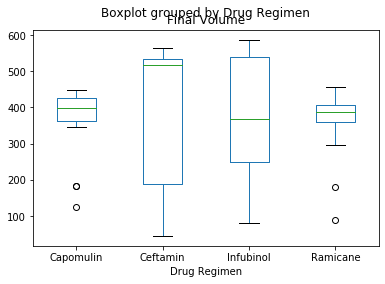

In [21]:
# Generating A Box Plot ## Could Not Highlight Outliers

box_plot = table_top4.boxplot(by='Drug Regimen', column=['Final Volume'], grid=False)

In [22]:
# Generating A Line Plot
combined_data1 = combined_data.loc[combined_data['Drug Regimen']=='Capomulin']
combined_data1

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [23]:
combined_data2 = combined_data1.loc[combined_data1['Mouse ID']=='b128']
combined_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


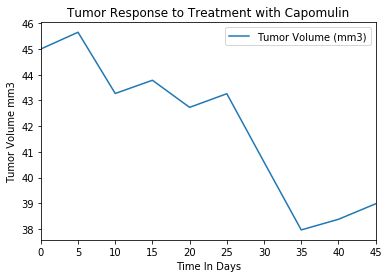

In [24]:
line_plot = combined_data2.plot.line(x='Timepoint', y='Tumor Volume (mm3)')
plt.title("Tumor Response to Treatment with Capomulin")
plt.xlabel("Time In Days")
plt.ylabel("Tumor Volume mm3")
plt.show()

In [25]:
combined_data2
combined_data2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
305,b128,Capomulin,Female,9,22,25,43.262145,1
306,b128,Capomulin,Female,9,22,30,40.605335,1
307,b128,Capomulin,Female,9,22,35,37.967644,1
308,b128,Capomulin,Female,9,22,40,38.379726,2
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [26]:
combined_data1
combined_data3 = combined_data1
combined_data3 = combined_data3.drop_duplicates('Mouse ID')
combined_data3 = combined_data3.set_index('Mouse ID')
combined_data3

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
s185,Capomulin,Female,3,17,0,45.0,0
x401,Capomulin,Female,16,15,0,45.0,0
m601,Capomulin,Male,22,17,0,45.0,0
f966,Capomulin,Male,16,17,0,45.0,0
u364,Capomulin,Male,18,17,0,45.0,0
y793,Capomulin,Male,17,17,0,45.0,0
r554,Capomulin,Female,8,17,0,45.0,0
m957,Capomulin,Female,3,19,0,45.0,0
t565,Capomulin,Female,20,17,0,45.0,0


In [27]:
avg_tumor_volume = combined_data1.groupby(['Mouse ID']).mean()['Tumor Volume (mm3)']
avg_tumor_volume

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [28]:
combined_data4 = combined_data3
combined_data4['Average Tumor Volume'] = avg_tumor_volume
combined_data4

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Average Tumor Volume
Mouse ID,,,,,,,,
s185,Capomulin,Female,3,17,0,45.0,0,34.559143
x401,Capomulin,Female,16,15,0,45.0,0,36.182040
m601,Capomulin,Male,22,17,0,45.0,0,34.847470
f966,Capomulin,Male,16,17,0,45.0,0,36.505973
u364,Capomulin,Male,18,17,0,45.0,0,39.887495
y793,Capomulin,Male,17,17,0,45.0,0,38.506829
r554,Capomulin,Female,8,17,0,45.0,0,36.509212
m957,Capomulin,Female,3,19,0,45.0,0,39.049816
t565,Capomulin,Female,20,17,0,45.0,0,39.328725


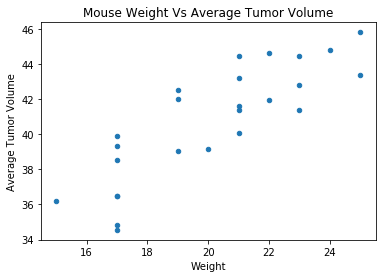

In [29]:
# Generating a Scatter plot for Mouse Weight vs Average tumor Volume

plot_scatter = combined_data4.plot.scatter(x='Weight (g)', y='Average Tumor Volume')
plt.xlabel("Weight")
plt.title("Mouse Weight Vs Average Tumor Volume")
plt.show()

In [30]:
# Calculate the correlation coefficient and linear regression model 
#between mouse weight and average tumor volume for the Capomulin treatment. 
#Plot the linear regression model on top of the previous scatter plot.

Weight = combined_data4.iloc[:,3]
AverageTumorVolume = combined_data4.iloc[:,7]
correlation = st.pearsonr(Weight,AverageTumorVolume)
print(f"The Correlation Between Both Factors is:{round(correlation[0],2)}")




The Correlation Between Both Factors is:0.84
